<a href="https://colab.research.google.com/github/vitorbarbosa123/reconhecimento-textos-ocr/blob/master/Reconhecimento_de_texto_com_OCR5ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python==4.6.0
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-python==4.6.0 (from versions: 3.4.0.14, 3.4.8.29, 3.4.9.31, 3.4.9.33, 3.4.10.35, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.1.2.30, 4.2.0.32, 4.2.0.34, 4.3.0.36, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68)
ERROR: No matching distribution found for opencv-python==4.6.0
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and

In [2]:
! git clone https://github.com/sthemonica/text-recognize
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

fatal: destination path 'text-recognize' already exists and is not an empty directory.
--2023-02-20 01:37:33--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2023-02-20 01:37:33--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2023-02-20 01:37:33--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.co

In [9]:
import pytesseract
import numpy as np
import cv2 
import re
import os
import matplotlib.pyplot as plt

from PIL import ImageFont, ImageDraw, Image
from pytesseract import Output
from google.colab.patches import cv2_imshow



In [10]:
projeto = "/content/text-recognize/Imagens/Projeto"
caminho = [os.path.join(projeto, f) for f in os.listdir(projeto)]
print(caminho)

['/content/text-recognize/Imagens/Projeto/artigo-eng-dados.png', '/content/text-recognize/Imagens/Projeto/artigo-spark.png', '/content/text-recognize/Imagens/Projeto/artigo-desbalanceamento.png', '/content/text-recognize/Imagens/Projeto/artigo-termos-ML.png']


In [13]:
def mostrar(img):
  fig = plt.gcf() # busca a figura atual
  fig.set_size_inches(20, 10) # define tamanho
  plt.axis("off") # remove a visualização dos eixos 
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

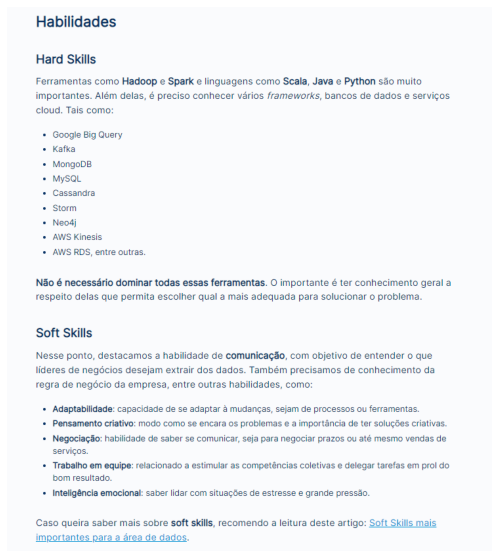

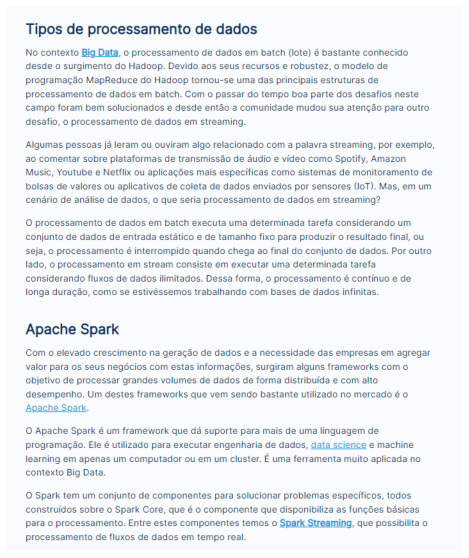

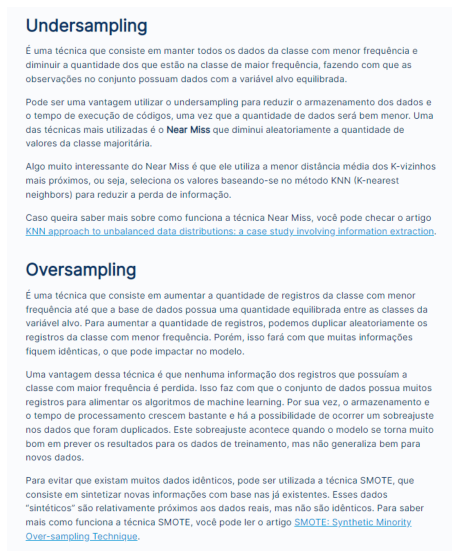

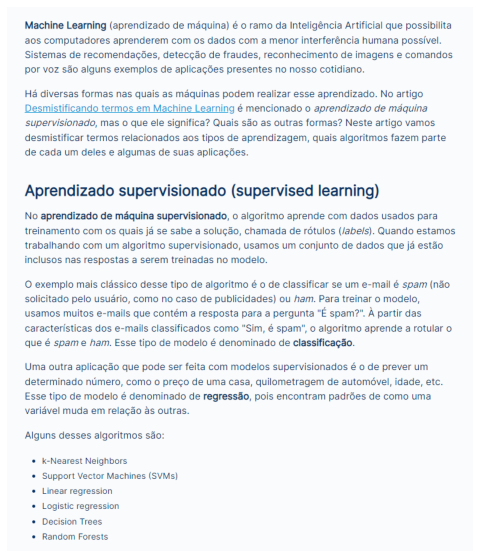

In [14]:
for imagem in caminho:
  imagem = cv2.imread(imagem)
  mostrar(imagem)

In [16]:
config_tesseract = '--tessdata-dir tessdata'

def OCR_processa(img, config_tesseract):
  texto =  pytesseract.image_to_string(img, lang='por', config=config_tesseract)
  return texto


In [17]:
texto_completo = ''
nome_txt = 'resultados_ocr.txt'

In [18]:
for imagem in caminho:
  img = cv2.imread(imagem)
  nome_imagem = os.path.split(imagem)[-1]
  nome_divisao = '=====================\n' + str(nome_imagem)
  texto_completo = texto_completo + nome_divisao + '\n'
  texto = OCR_processa(img, config_tesseract)
  texto_completo = texto_completo + texto

In [19]:
## salvar txt
arquivo_txt = open(nome_txt, 'w+') #a+ p/ adicionar no final de arquivo, w+ sobrescrever arquivo
arquivo_txt.write(texto_completo + '\n')
arquivo_txt.close()

In [21]:
termo_pesquisa = 'learning'

In [22]:
with open(nome_txt) as f:
  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, f.read())]
  

In [26]:
for imagem in caminho:
  img = cv2.imread(imagem)
  nome_imagem = os.path.split(imagem)[-1]
  print ('=====================\n' + str(nome_imagem))
  texto = OCR_processa(img, config_tesseract)
  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, texto)]

  print('Numero de ocorrências para o termo: {}: {}'.format(termo_pesquisa, len(ocorrencias)))
  print('\n')

artigo-eng-dados.png
Numero de ocorrências para o termo: learning: 0


artigo-spark.png
Numero de ocorrências para o termo: learning: 1


artigo-desbalanceamento.png
Numero de ocorrências para o termo: learning: 1


artigo-termos-ML.png
Numero de ocorrências para o termo: learning: 1




In [42]:
fonte_dir = '/content/text-recognize/Imagens/calibri.ttf'
min_conf = 30

def escreve_texto(texto, x, y, img, fonte_dir, cor=(50, 50, 255), tamanho_texto=16):
  fonte = ImageFont.truetype(fonte_dir, tamanho_texto)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho_texto), texto, font = fonte, fill = cor)
  img = np.array(img_pil)
  return img


def caixa_texto(i, resultado, img, cor = (255,100,0)):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(img, (x,y), (x+w,y+h), cor, 2)
  # 2 - borda

  return x,y, img

In [48]:
def OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf):
  resultado =  pytesseract.image_to_data(img, config=config_tesseract, lang='por', output_type=Output.DICT)
  num_ocorrencias = 0

  for i in range(0, len(resultado['text'])):
    confianca = int(resultado['conf'][i])
  
    if confianca > min_conf:
      texto = resultado['text'][i]
      if termo_pesquisa.lower() in texto.lower():
        x, y, img = caixa_texto(i, resultado, img, (0,0,255))
        img = escreve_texto(texto, x, y, img, fonte_dir, (50,50,225), 14)
        num_ocorrencias += 1
  return img, num_ocorrencias

artigo-eng-dados.png
Numero de ocorrências para o termo: learning: artigo-eng-dados.png




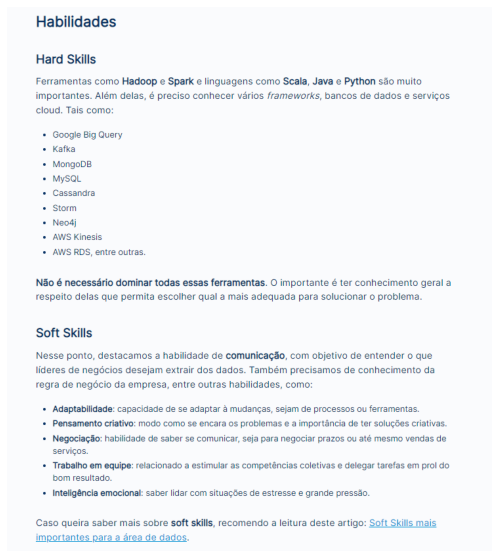

artigo-spark.png
Numero de ocorrências para o termo: learning: artigo-spark.png




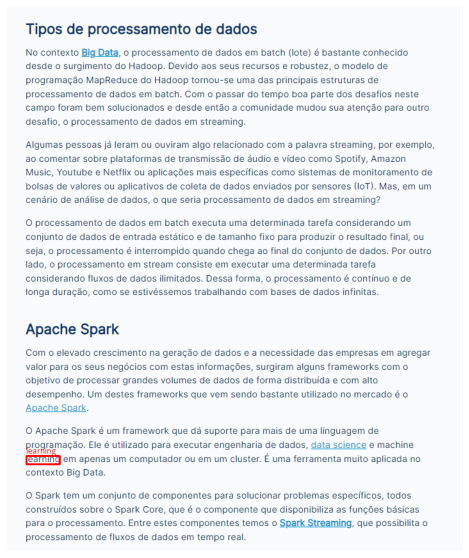

artigo-desbalanceamento.png
Numero de ocorrências para o termo: learning: artigo-desbalanceamento.png




artigo-termos-ML.png
Numero de ocorrências para o termo: learning: artigo-termos-ML.png




In [49]:
for imagem in caminho:
  img = cv2.imread(imagem)
  img_original = img.copy()

  nome_imagem = os.path.split(imagem)[-1]
  print('=====================\n' + str(nome_imagem))

  img, numero_ocorrencias = OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf)
  print('Numero de ocorrências para o termo: {}: {}'.format(termo_pesquisa, nome_imagem, numero_ocorrencias))
  print('\n')

  mostrar(img)

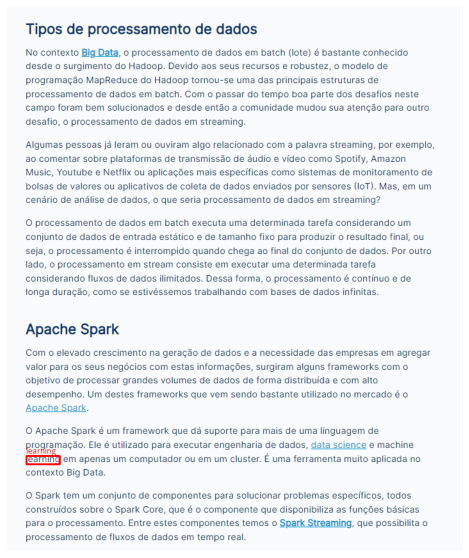

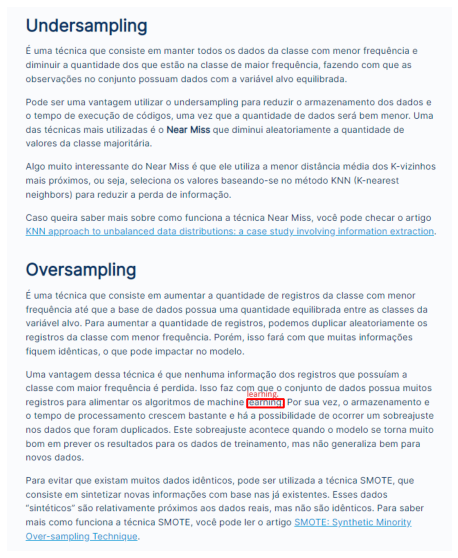

In [50]:
import os
os.makedirs('images_project', exist_ok=True)
for imagem in caminho:
  img = cv2.imread( imagem)
  img_original = img.copy()
  nome_imagem = os.path.split(imagem)[-1]
  img, numero_ocorrencias = OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf)
  if numero_ocorrencias > 0:
    mostrar(img)
    novo_nome_imagem = 'OCR_' + nome_imagem
    nova_imagem = 'images_project/' + str(novo_nome_imagem)
    cv2.imwrite(nova_imagem, img)